# Quantify behavioral data from fMRI C-PRO experiment

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import analyzeBehavior as analyze
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Arial"

##### Load and sort data

In [3]:
datadir = '../../../data/fMRI_BehavData/'

subjNums = ['013','014','016','017','018','021','023','024','025','026','027','028','030','031','032','033','034','035','037','038','039','040','041','042','043','045','046','047','048','049','050','053','055','056','057','058','062','063','064','066','067','068','069','070','072','074','075','076','077','081','082','085','086','087','088','090','092','093','094','095','097','098','099','101','102','103','104','105','106','108','109','110','111','112','114','115','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','134','135','136','137','138','139','140','141']

# # ### Doesn't need to be run again

# keyValues = {'Logic':'LogicCue[LogLevel5]', 'Sensory':'SemanticCue[LogLevel5]', 'Motor':'ResponseCue[LogLevel5]','RT':'Feedback[LogLevel6]', 'Novelty':'TaskType_rec', 'TaskNum':'TaskName[LogLevel5]',
#              'PracTaskIntro':'PracIntroExampleList',
#              'LogicExample':'LogicCue[SubTrial]','SensoryExample':'SemanticCue[SubTrial]','MotorExample':'ResponseCue[SubTrial]',
#              'PracIntroRT':'Feedback[LogLevel5]','RT':'ProbeStim1.RT'}
# # Simplify dataframe into easier key-value strings
# for subj in subjNums:
#     df = pd.read_csv(datadir + subj + '_behavdata.csv')
#     df_new = {}
#     for key in keyValues:
#         df_new[key] = df[keyValues[key]].values
        
#     df = pd.DataFrame(df_new)
#     df.to_csv(datadir + subj + '_behavdata_reformatted.csv')
        

# Plot performances across different conditions
* Novel and practiced conditions
* 1st presentation of practiced tasks, 2nd presentation of practiced tasks
* 1st presentation of novel tasks, 2nd presentation of novel tasks

# Practiced vs. novel tasks

Practice RT: 1762.6868177659524
Novel RT: 1789.9919987301778
Practiced versus Novel: t = -2.2587431638517437 | p = 0.02609292215637987


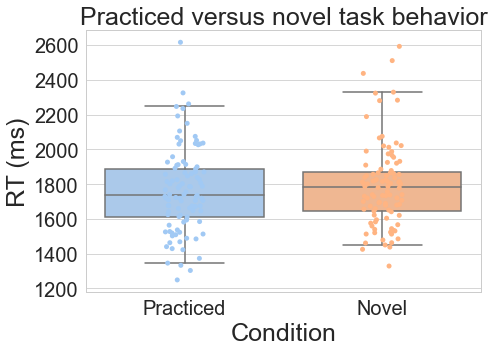

In [33]:
analyze = reload(analyze)
df_rt = analyze.behaviorOfNovelty(subjNums,behavior='RT')

prac_rt = df_rt.loc[df_rt['Condition']=='Practiced']
nov_rt = df_rt.loc[df_rt['Condition']=='Novel']
print('Practice RT:', np.mean(prac_rt.RT.values))
print('Novel RT:', np.mean(nov_rt.RT.values))
t, p = stats.ttest_rel(prac_rt.RT.values,nov_rt.RT.values)
print('Practiced versus Novel: t =', t, '| p =', p)


plt.figure(figsize=(7,5))
tmp_df = pd.concat([prac_rt,nov_rt])
plt.title('Practiced versus novel task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="RT",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="RT",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Plot RT differences for 1st versus 2nd presentations for practiced and novel conditions

Practice 1 acc = 1767.4333080808078 | Practice 2 acc = 1759.9174336219332
Practiced 1 versus Practiced 2: t = 0.31249395868683694 | p = 0.7553224300815256
Novel 1 acc = 1797.7162367667627 | Novel 2 acc = 1783.00192850155
Novel 1 versus Novel 2: t = 1.6164836037053918 | p = 0.10917207147648941


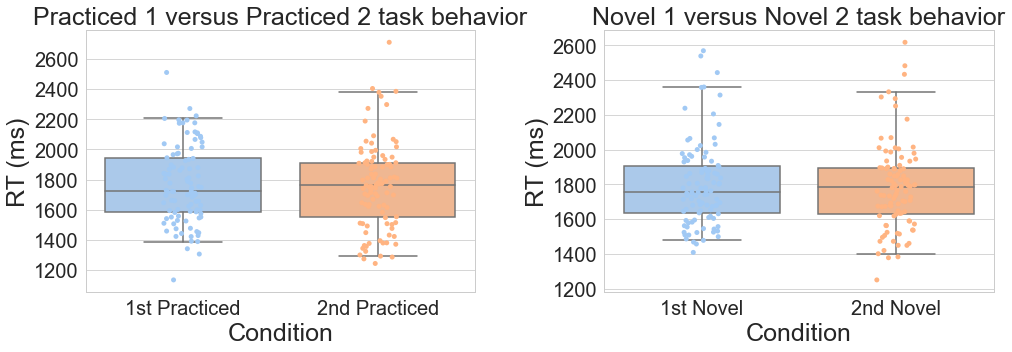

In [34]:
prac1_rt = df_rt.loc[df_rt['Condition']=='1st Practiced']
prac2_rt = df_rt.loc[df_rt['Condition']=='2nd Practiced']
nov1_rt = df_rt.loc[df_rt['Condition']=='1st Novel']
nov2_rt = df_rt.loc[df_rt['Condition']=='2nd Novel']
print('Practice 1 acc =', np.mean(prac1_rt.RT.values), '| Practice 2 acc =', np.mean(prac2_rt.RT.values))
t, p = stats.ttest_rel(prac1_rt.RT.values,prac2_rt.RT.values)
print('Practiced 1 versus Practiced 2: t =', t, '| p =', p)
print('Novel 1 acc =', np.mean(nov1_rt.RT.values), '| Novel 2 acc =', np.mean(nov2_rt.RT.values))
t, p = stats.ttest_rel(nov1_rt.RT.values,nov2_rt.RT.values)
print('Novel 1 versus Novel 2: t =', t, '| p =', p)




plt.figure(figsize=(14,5))
plt.subplot(121)
tmp_df = pd.concat([prac1_rt,prac2_rt])
plt.title('Practiced 1 versus Practiced 2 task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="RT",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="RT",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

plt.subplot(122)
tmp_df = pd.concat([nov1_rt,nov2_rt])
plt.title('Novel 1 versus Novel 2 task behavior',fontsize=25)
ax = sns.boxplot(x="Condition",y="RT",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="RT",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Evaluate performances of task similarity to practiced tasks
* Practiced task → 2 rule similarity → 1 rule similarity

Practice RT: 1762.6868177659524
2-rule similarity RT: 1785.2375240251727
1-rule similarity RT: 1797.2027898957717
Practiced versus 2-rule: t = -1.9140965091871454 | p = 0.05849567925416421
2-rule versus 1-rule: t = -2.327476734751367 | p = 0.02197603782575172


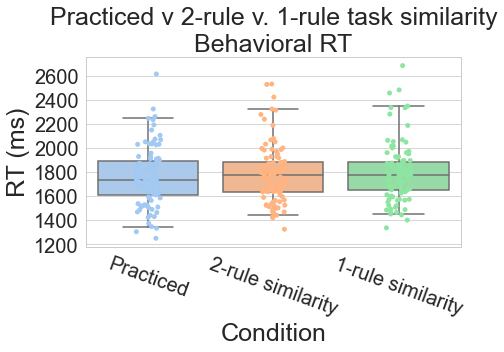

In [39]:
analyze = reload(analyze)
df_rt = analyze.behaviorOfTaskSimilarity(subjNums,firstOnly=False,behavior='RT')

prac_rt = df_rt.loc[df_rt['Condition']=='Practiced']
rule2_rt = df_rt.loc[df_rt['Condition']=='2-rule similarity']
rule1_rt = df_rt.loc[df_rt['Condition']=='1-rule similarity']
print('Practice RT:', np.mean(prac_rt.RT.values))
print('2-rule similarity RT:', np.mean(rule2_rt.RT.values))
print('1-rule similarity RT:', np.mean(rule1_rt.RT.values))
t, p = stats.ttest_rel(prac_rt.RT.values,rule2_rt.RT.values)
print('Practiced versus 2-rule: t =', t, '| p =', p)
t, p = stats.ttest_rel(rule2_rt.RT.values,rule1_rt.RT.values)
print('2-rule versus 1-rule: t =', t, '| p =', p)


plt.figure(figsize=(7,5))
tmp_df = pd.concat([prac_rt,rule2_rt,rule1_rt])
plt.title('Practiced v 2-rule v. 1-rule task similarity\nBehavioral RT',fontsize=25)
ax = sns.boxplot(x="Condition",y="RT",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="RT",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=-20,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()

# Practiced v 2-rule v 1-rule on first presentation of tasks only

Practice RT: 1767.4333080808078
2-rule similarity RT: 1792.434047078791
1-rule similarity RT: 1805.8169874342757
Practiced versus 2-rule: t = -1.4052803735789339 | p = 0.16306823805390505
2-rule versus 1-rule: t = -1.6894865073568048 | p = 0.09427324054564308


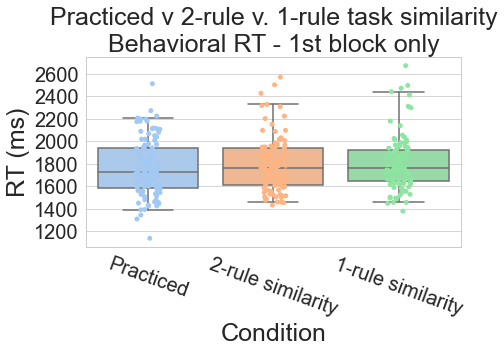

In [42]:
analyze=reload(analyze)
df_rt = analyze.behaviorOfTaskSimilarity(subjNums,firstOnly=True,behavior='RT')

prac_rt = df_rt.loc[df_rt['Condition']=='Practiced']
rule2_rt = df_rt.loc[df_rt['Condition']=='2-rule similarity']
rule1_rt = df_rt.loc[df_rt['Condition']=='1-rule similarity']
print('Practice RT:', np.mean(prac_rt.RT.values))
print('2-rule similarity RT:', np.mean(rule2_rt.RT.values))
print('1-rule similarity RT:', np.mean(rule1_rt.RT.values))
t, p = stats.ttest_rel(prac_rt.RT.values,rule2_rt.RT.values)
print('Practiced versus 2-rule: t =', t, '| p =', p)
t, p = stats.ttest_rel(rule2_rt.RT.values,rule1_rt.RT.values)
print('2-rule versus 1-rule: t =', t, '| p =', p)


plt.figure(figsize=(7,5))
tmp_df = pd.concat([prac_rt,rule2_rt,rule1_rt])
plt.title('Practiced v 2-rule v. 1-rule task similarity\nBehavioral RT - 1st block only',fontsize=25)
ax = sns.boxplot(x="Condition",y="RT",data=tmp_df,
           medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
ax = sns.stripplot(x="Condition",y="RT",data=tmp_df,
              dodge=True,palette="pastel")
plt.xticks(rotation=-20,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=25)
plt.xlabel('Condition', fontsize=25)
plt.tight_layout()